<a href="https://colab.research.google.com/github/hinaabbaskhan/snapchat-filters-mediapipe/blob/main/mediapipe_face_mesh_snapchat_filters_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

In [8]:
!pip install mediapipe
!pip install opencv-python

Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [9]:
from google.colab import files
uploaded = files.upload()

Saving sample.webp to sample (3).webp


In [10]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import itertools
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [11]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)



sample (3).webp


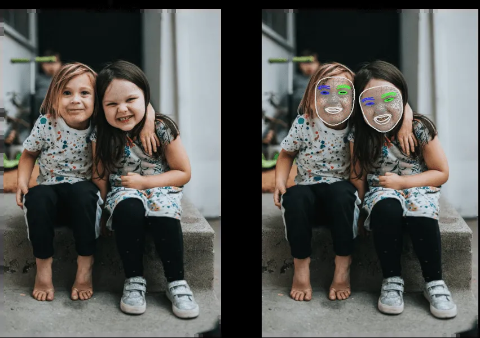

In [12]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as `mp_face_mesh = mp.solutions.face_mesh`.

You may change the parameters, such as `static_image_mode`, `max_num_faces`, and `min_detection_confidence`, during the initialization. Run `help(mp_face_mesh.FaceMesh)` to get more informations about the parameters.

In [13]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

In [14]:
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [15]:
# Setup the face landmarks function for videos.
face_mesh_videos = mp_face_mesh.FaceMesh(
      static_image_mode=False,
      refine_landmarks=True,
      max_num_faces=1,
      min_detection_confidence=0.5,
      min_tracking_confidence=0.3)
# Setup MediaPipe Face Mesh for Images.
face_mesh_images= mp_face_mesh.FaceMesh(
       static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5)

In [16]:
# Setup and Run MediaPipe Face Mesh for Images.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:


  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Get the list of indexes for the list of left eye and right eye
    # LEFT_EYE_INDEX  = list(set(Itertools.chain(mp_face_mesh.FACEMESH_LEFT_EYE)))
    # RIGHT_EYE_INDEX  = list(set(Itertools.chain(mp_face_mesh.FACEMESH_RIGHT_EYE)))


    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

Face landmarks of sample (3).webp:


In [17]:
  def detectFacialLandmarks(image, face_mesh, display=True) :
    """
    Args:
      images:
      face_mesh:
      display:
    """

    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')

    output_image = image.copy()

    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=output_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=output_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=output_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())

    if display :
      resize_and_show(image)
      resize_and_show(output_image)
    else:
      return np.ascontiguousarray(output_image), results

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2024-06-23 at 9.42.53 PM.png to Screenshot 2024-06-23 at 9.42.53 PM (4).png


Screenshot 2024-06-23 at 9.42.53 PM (4).png
Face landmarks of Screenshot 2024-06-23 at 9.42.53 PM (4).png:


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


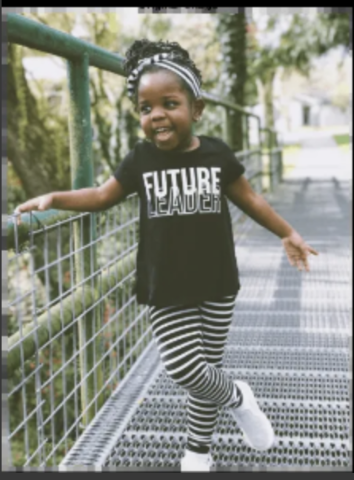

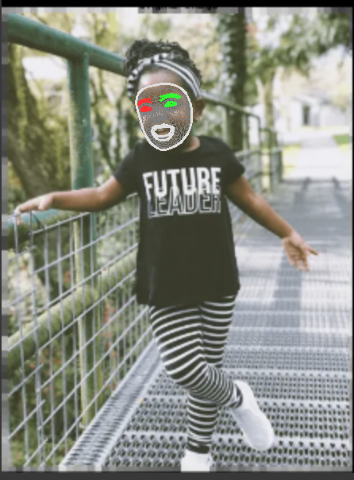

In [19]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  detectFacialLandmarks(image, face_mesh_images, display=True)

In [ ]:
  import cv2

  camera_video = cv2.VideoCapture(0)


  if not camera_video.isOpened():
    print("Error: Could not open camera.")
    exit()


  print("open camera.")

  camera_video.set(3,1280)
  camera_video.set(4,960)

  # Create named window for resizing purposes.
  cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

  # Initialize a variable to store the time of the previous frame.
  time1 = 0

  # Iterate until the webcam is accessed successfully.
  while camera_video.isOpened():

      # Read a frame.
      ok, frame = camera_video.read()

      # Check if frame is not read properly then continue to the next iteration to
      # read the next frame.
      if not ok:
          continue

      # Flip the frame horizontally for natural (selfie-view) visualization.
      frame = cv2.flip(frame, 1)

      # Perform Face landmarks detection.
      frame, _ = detectFacialLandmarks(frame, face_mesh_video, display=False)

      # Set the time for this frame to the current time.
      time2 = time()

      # Check if the difference between the previous and this frame time &gt; 0 to avoid
      # division by zero.
      if (time2 - time1) > 0:

          # Calculate the number of frames per second.
          frames_per_second = 1.0 / (time2 - time1)

          # Write the calculated number of frames per second on the frame.
          cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                      cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

      # Update the previous frame time to this frame time.
      # As this frame will become previous frame in next iteration.
      time1 = time2

      # Display the frame.
      cv2.imshow('Face Landmarks Detection', frame)

      # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
      k = cv2.waitKey(1) &amp; 0xFF

      # Check if 'ESC' is pressed and break the loop.
      if(k == 27):
          break

  # Release the VideoCapture Object and close the windows.
  camera_video.release()
  cv2.destroyAllWindows()